In [5]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the 'scripts' folder to the Python path
sys.path.append(os.path.abspath('../scripts'))
# Import the preprocessing functions from preprocess_data.py
from preprocess_data import preprocess_crashes_data_key_attributes, preprocess_vehicle_crash_data_key_attributes, party_type_mapping, sobriety_mapping, collision_type_mapping

# Load the datasets
crashes_df = pd.read_csv('../data/raw/crashdata2022-present.csv')
vehicle_crashes_df = pd.read_csv('../data/raw/vehiclecrashdata2022-present.csv')

# Apply preprocessing to the crash data
processed_crashes_path = '../data/processed/processed_crashes.csv'
processed_crashes_data = pd.read_csv(processed_crashes_path)

# Display basic information about the dataset
print("Dataset Shape (Rows, Columns):", processed_crashes_data.shape)
print("\nDataset Columns:", processed_crashes_data.columns.tolist())

# Display the first few rows of the dataset to understand its structure
print("\nFirst 5 Rows of the Dataset:")
print(processed_crashes_data.head())

Dataset Shape (Rows, Columns): (73648, 10)

Dataset Columns: ['CrashFactId', 'Name', 'MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'Distance', 'CrashTime']

First 5 Rows of the Dataset:
   CrashFactId           Name  MinorInjuries  ModerateInjuries  \
0       591079  CR-0000071607              0                 0   
1       591080  CR-0000071780              0                 0   
2       591081  CR-0000060418              0                 0   
3       591082  CR-0000060410              0                 1   
4       591083  CR-0000060514              2                 0   

   SevereInjuries  FatalInjuries  PrimaryCollisionFactor_Code  \
0               0              0                            5   
1               0              0                            5   
2               0              0                            5   
3               0              0                            5   
4            

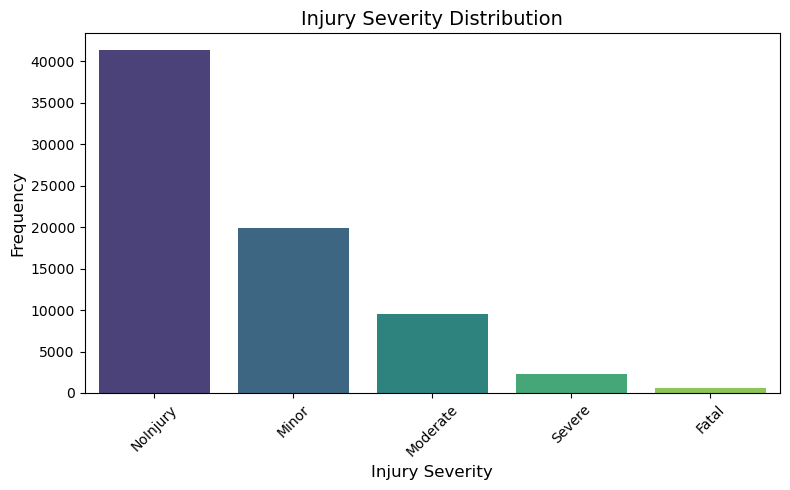

InjurySeverity
NoInjury    41303
Minor       19861
Moderate     9561
Severe       2271
Fatal         652
Name: count, dtype: int64


In [ ]:
# Map severity levels based on injury columns
processed_crashes_data['InjurySeverity'] = processed_crashes_data.apply(
    lambda row: 'Fatal' if row['FatalInjuries'] > 0 else
                'Severe' if row['SevereInjuries'] > 0 else
                'Moderate' if row['ModerateInjuries'] > 0 else
                'Minor' if row['MinorInjuries'] > 0 else
                'NoInjury', axis=1
)

# Calculate severity counts
severity_counts = processed_crashes_data['InjurySeverity'].value_counts()

# Plot Injury Severity Distribution
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(
    x=severity_counts.index, 
    y=severity_counts.values, 
    hue=severity_counts.index, 
    palette="viridis", 
    dodge=False, 
    legend=False
)

# Add counts on top of the bars
for bar, count in zip(bar_plot.patches, severity_counts.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text on the bar
        bar.get_height() + 50,             # Slightly above the bar
        f'{count}',                        # The count value
        ha='center', va='bottom', fontsize=10
    )

plt.title('Injury Severity Distribution', fontsize=14)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()